Similar to strategy_09a except that we use log prices to choose correlated triples of coins and to calculate beta and alpha for the portfolio's holdings.

In [1]:
# Historical snapshot of coins from December 01, 2019: https://coinmarketcap.com/historical/20191201/ used to
# get a representative set of coins from before the period of analysis to avoid look-ahead bias.

strat_univ = [
    'BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'BCHUSDT', 'LTCUSDT', 'EOSUSDT', 'BNBUSDT',
    'XLMUSDT', 'TRXUSDT', 'ADAUSDT', 'XTZUSDT', 'LINKUSDT', 'ATOMUSDT',
    'NEOUSDT', 'MKRUSDT', 'DASHUSDT', 'ETCUSDT', 'USDCUSDT', 'ONTUSDT', 'VETUSDT',
    'DOGEUSDT', 'BATUSDT', 'ZECUSDT',
    'SNXUSDT', 'QTUMUSDT', 'TUSDUSDT', 'ZRXUSDT',
    'THXUSDT', 'THRUSDT', 'ALGOUSDT', 'REPUSDT', 'NANOUSDT', 'KBCUSDT', 'BTGUSDT', 'RVNUSDT', 'OMGUSDT',
    'CNXUSDT', 'ABBCUSDT', 'XINUSDT', 'VSYSUSDT', 'SEELEUSDT', 'EONUSDT', 'ZBUSDT', 'EKTUSDT', 'DGBUSDT',
    'BTMUSDT', 'LSKUSDT', 'KMDUSDT', 'SAIUSDT', 'LUNAUSDT', 'KCSUSDT', 'FTTUSDT', 'QNTUSDT', 'SXPUSDT',
    'BDXUSDT', 'GAPUSDT', 'BCDUSDT', 'THETAUSDT', 'ICXUSDT', 'FSTUSDT', 'MATICUSDT', 'SCUSDT', 'EVRUSDT',
    'BTTUSDT', 'MOFUSDT', 'IOSTUSDT', 'MCOUSDT', 'WAVESUSDT', 'XVGUSDT', 'MONAUSDT', 'BTSUSDT', 'BCNUSDT',
    'HCUSDT', 'MAIDUSDT', 'NEXOUSDT', 'ARDRUSDT', 'DXUSDT', 'OKBUSDT', 'FXCUSDT', 'RLCUSDT', 'MBUSDT',
    'BXKUSDT', 'AEUSDT', 'ENJUSDT', 'STEEMUSDT', 'SLVUSDT', 'BRZEUSDT', 'ZILUSDT', 'VESTUSDT', 'ZENUSDT',
    'SOLVEUSDT', 'CHZUSDT', 'NOAHUSDT', 'LAUSDT', 'BTMXUSDT', 'ETNUSDT', 'ENGUSDT', 'ILCUSDT', 'NPXSUSDT',
    'CRPTUSDT', 'GNTUSDT', 'SNTUSDT', 'ELFUSDT', 'JWLUSDT', 'FETUSDT', 'BOTXUSDT', 'NRGUSDT', 'DGDUSDT',
    'EXMRUSDT', 'EURSUSDT', 'AOAUSDT', 'RIFUSDT', 'CIX100USDT', 'BFUSDT', 'XZCUSDT', 'FABUSDT', 'GRINUSDT',
    'NETUSDT', 'VERIUSDT', 'DGTXUSDT', 'KNCUSDT', 'RENUSDT', 'STRATUSDT', 'ETPUSDT', 'NEXUSDT', 'NEWUSDT',
    'BCZEROUSDT', 'GXCUSDT', 'TNTUSDT', 'BTC2USDT', 'PPTUSDT', 'USDKUSDT', 'ELAUSDT', 'IGNISUSDT', 'PLCUSDT',
    'BNKUSDT', 'DTRUSDT', 'RCNUSDT', 'HPTUSDT', 'LAMBUSDT', 'MANAUSDT', 'EDCUSDT', 'BEAMUSDT', 'TTUSDT',
    'AIONUSDT', 'BZUSDT', 'WTCUSDT', 'WICCUSDT', 'LRCUSDT', 'BRDUSDT', 'FCTUSDT', 'NULSUSDT', 'FTMUSDT',
    'IOTXUSDT', 'QBITUSDT', 'XMXUSDT', 'YOUUSDT', 'NASUSDT', 'WAXPUSDT', 'ARKUSDT', 'RDDUSDT', 'GNYUSDT',
    'AGVCUSDT', 'HYNUSDT', 'CVCUSDT', 'WANUSDT', 'WINUSDT', 'LINAUSDT', 'RUSDT', 'PAIUSDT', 'FSNUSDT',
    'FUNUSDT', 'DPTUSDT', 'BHDUSDT', 'LOOMUSDT', 'XACUSDT', 'BUSDUSDT', 'BHPUSDT', 'TRUEUSDT', 'LOKIUSDT',
    'QASHUSDT', 'BNTUSDT', 'DOTUSDT', 'SOLUSDT']

## Load And Structure Data

In [2]:
from binance.client import Client as bnb_client
from binance.client import BinanceAPIException
from datetime import datetime
import pandas as pd

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in strat_univ:
        try:
            px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
            print(f"Downloaded data for {coin}.")
        except BinanceAPIException:
            print(f"Couldn't load data for {coin}.")
    
    return px_data

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
data_freq = '4h'
look_back_window_size = 30 * 6
look_back_min_periods = 10 * 6
start_datetime = '2020-01-01 00:00:00'
# in_sample_end = pd.to_datetime("2022-12-31 20:00:00")
# out_sample_start = pd.to_datetime("2023-01-01 00:00:00")

In [4]:
px_data = get_price_data_for_universe(data_freq, start_datetime)

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for XRPUSDT.
Downloaded data for BCHUSDT.
Downloaded data for LTCUSDT.
Downloaded data for EOSUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XLMUSDT.
Downloaded data for TRXUSDT.
Downloaded data for ADAUSDT.
Downloaded data for XTZUSDT.
Downloaded data for LINKUSDT.
Downloaded data for ATOMUSDT.
Downloaded data for NEOUSDT.
Downloaded data for MKRUSDT.
Downloaded data for DASHUSDT.
Downloaded data for ETCUSDT.
Downloaded data for USDCUSDT.
Downloaded data for ONTUSDT.
Downloaded data for VETUSDT.
Downloaded data for DOGEUSDT.
Downloaded data for BATUSDT.
Downloaded data for ZECUSDT.
Downloaded data for SNXUSDT.
Downloaded data for QTUMUSDT.
Downloaded data for TUSDUSDT.
Downloaded data for ZRXUSDT.
Couldn't load data for THXUSDT.
Couldn't load data for THRUSDT.
Downloaded data for ALGOUSDT.
Couldn't load data for REPUSDT.
Couldn't load data for NANOUSDT.
Couldn't load data for KBCUSDT.
Couldn't load data 

In [5]:
import numpy as np

px_close = {coin: px_data[coin]["close"] for coin in px_data}
px_close = pd.DataFrame(px_close).astype(float)
px_close.index.rename("datetime", inplace=True)

log_px_close = np.log(px_close)
log_px_close

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,8.886093,4.868918,-1.639588,5.326127,3.727619,NaN,2.625820,-3.097765,NaN,-3.408826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,8.882600,4.871526,-1.633833,5.331365,3.726898,NaN,2.622115,-3.102650,NaN,-3.405205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,8.881253,4.873975,-1.642064,5.325981,3.729781,NaN,2.618578,-3.099095,NaN,-3.404904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,8.886412,4.881589,-1.638455,5.330930,3.735047,NaN,2.624364,-3.091803,NaN,-3.394122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,8.885125,4.882650,-1.636090,5.329574,3.732657,NaN,2.619365,-3.090703,NaN,-3.392932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-17 16:00:00,11.466945,7.908207,0.974560,5.772375,4.794219,-0.508661,6.494933,-1.097213,NaN,-0.216540,...,-1.129175,-1.981952,-0.566515,-3.456816,-3.294408,-3.057608,NaN,-0.549913,1.577947,5.178689
2025-02-17 20:00:00,11.469310,7.916851,0.978890,5.783517,4.807458,-0.413850,6.501155,-1.097213,NaN,-0.214060,...,-1.104127,-1.981952,-0.482562,-3.456816,-3.294947,-3.057608,NaN,-0.549913,1.577534,5.179646
2025-02-18 00:00:00,11.474299,7.905571,0.978251,5.774241,4.834852,-0.510326,6.496473,-1.095417,NaN,-0.212822,...,-1.102922,-2.037149,-0.472727,-3.456816,-3.505558,-3.057608,NaN,-0.549913,1.588214,5.181671


In [6]:
from enum import Enum

class CorrSelectionMethod(Enum):
    MAX_CORR = 1
    MIN_CORR = 2

In [26]:
import statsmodels.api as sm

def has_high_corr_pair_available(coin, corr_matrix, coins_in_a_triple, log_px_close_window,
                                 correlation_acceptance_threshold):
    if np.isnan(log_px_close_window[coin]).any():
        return False
    num_available_coins = 0
    for other_coin in corr_matrix[coin][corr_matrix[coin] > correlation_acceptance_threshold].index:
        if (other_coin != coin and (other_coin not in coins_in_a_triple) and \
            (not np.isnan(log_px_close_window[other_coin]).any())):
            num_available_coins += 1
    return num_available_coins >= 2


def update_correlated_coins_to_min_corr(coin, corr_matrix, coins_in_a_triple, current_correlated_triples,
                                        log_px_close_data, correlation_acceptance_threshold):
    min_corr = 1.0
    min_corr_coin = None
    second_smallest_corr = 1.0
    second_min_corr_coin = None
    for other_coin in corr_matrix[coin][corr_matrix[coin] > correlation_acceptance_threshold].index:
        if np.isnan(log_px_close_data[other_coin]).any():
            continue
        elif other_coin in coins_in_a_triple:
            continue
        elif other_coin != coin and corr_matrix.loc[coin, other_coin] <= min_corr:
            second_smallest_corr, min_corr = min_corr, corr_matrix.loc[coin, other_coin]
            second_min_corr_coin, min_corr_coin = min_corr_coin, other_coin
        elif other_coin != coin and corr_matrix.loc[coin, other_coin] <= second_smallest_corr:
            second_smallest_corr = corr_matrix.loc[coin, other_coin]
            second_min_corr_coin = other_coin
    coins_in_a_triple.add(coin)
    coins_in_a_triple.add(min_corr_coin)
    coins_in_a_triple.add(second_min_corr_coin)
    current_correlated_triples[coin] = pd.DataFrame(
        0.0, columns=[min_corr_coin, second_min_corr_coin, 'alpha', 'residual'], index=[])


def update_correlated_coins_to_max_corr(coin, corr_matrix, coins_in_a_triple, current_correlated_triples,
                                        log_px_close_data, correlation_acceptance_threshold):
    max_corr = -1.0
    max_corr_coin = None
    second_largest_corr = -1.0
    second_largest_corr_coin = None
    for other_coin in corr_matrix[coin][corr_matrix[coin] > correlation_acceptance_threshold].index:
        if np.isnan(log_px_close_data[other_coin]).any():
            continue
        elif other_coin in coins_in_a_triple:
            continue
        elif other_coin != coin and corr_matrix.loc[coin, other_coin] >= max_corr:
            second_largest_corr, max_corr = max_corr, corr_matrix.loc[coin, other_coin]
            second_largest_corr_coin, max_corr_coin = max_corr_coin, other_coin
        elif other_coin != coin and corr_matrix.loc[coin, other_coin] >= second_largest_corr:
            second_largest_corr = corr_matrix.loc[coin, other_coin]
            second_largest_corr_coin = other_coin
    coins_in_a_triple.add(coin)
    coins_in_a_triple.add(max_corr_coin)
    coins_in_a_triple.add(second_largest_corr_coin)
    current_correlated_triples[coin] = pd.DataFrame(
        0.0, columns=[max_corr_coin, second_largest_corr_coin, 'alpha', 'residual'], index=[])


def get_holdings_df(log_px_close_df, look_back_min_periods, look_back_window_size,
                    correlation_acceptance_threshold, correlation_rejection_threshold,
                    min_data_points_to_transact, z_score_min_threshold, z_score_max_threshold,
                    corr_selection_method):
    holdings_df = pd.DataFrame(0.0, columns = log_px_close_df.columns, index = log_px_close_df.index)
    
    # map from dependent coin to dataframe of successive regression coefficients and residuals
    current_correlated_triples = dict()
    coins_in_a_triple = set()
    
    for index in range(look_back_min_periods, len(holdings_df)):
        window_start = max(index-look_back_window_size, 0)
        log_px_close_window_df = log_px_close_df.iloc[window_start:index]
        
        time_index = log_px_close_df.index[index]
        holdings_df.loc[time_index] = pd.Series(0.0, index=holdings_df.columns)    
        
        corr_matrix = log_px_close_window_df.corr()
        newly_uncorrelated_keys = set()
        for key_coin in current_correlated_triples:
            value_coin_1 = current_correlated_triples[key_coin].columns[0]
            value_coin_2 = current_correlated_triples[key_coin].columns[1]
            
            triple_list = [key_coin, value_coin_1, value_coin_2]
            
            if log_px_close_window_df[triple_list].iloc[-1].isnull().any():
                newly_uncorrelated_keys.add(key_coin)
            elif ((corr_matrix.loc[key_coin, value_coin_1] < correlation_rejection_threshold or \
                   corr_matrix.loc[key_coin, value_coin_2] < correlation_rejection_threshold)):
                newly_uncorrelated_keys.add(key_coin)
        
        for coin in newly_uncorrelated_keys:
            coins_in_a_triple.remove(coin)
            coins_in_a_triple.remove(current_correlated_triples[coin].columns[0])
            coins_in_a_triple.remove(current_correlated_triples[coin].columns[1])
            
            if coin in current_correlated_triples: # only the dependent coin will appear as a key
                del current_correlated_triples[coin]
            
        for coin in holdings_df.columns:
            if (coin not in coins_in_a_triple) and \
                has_high_corr_pair_available(coin, corr_matrix, coins_in_a_triple, log_px_close_window_df,
                                             correlation_acceptance_threshold) and \
                corr_selection_method == CorrSelectionMethod.MAX_CORR:
                
                update_correlated_coins_to_max_corr(coin, corr_matrix, coins_in_a_triple,
                                                    current_correlated_triples, log_px_close_window_df,
                                                    correlation_acceptance_threshold)
            elif (coin not in coins_in_a_triple) and \
                has_high_corr_pair_available(coin, corr_matrix, coins_in_a_triple, log_px_close_window_df,
                                             correlation_acceptance_threshold) and \
                corr_selection_method == CorrSelectionMethod.MIN_CORR:
                
                update_correlated_coins_to_min_corr(coin, corr_matrix, coins_in_a_triple,
                                                    current_correlated_triples, log_px_close_window_df,
                                                    correlation_acceptance_threshold)
        
        ##################### SPLIT HERE TO REFACTOR INTO SUB-FUNCTIONS
        
        for coin in current_correlated_triples:
            independent_coin_1 = current_correlated_triples[coin].columns[0]
            independent_coin_2 = current_correlated_triples[coin].columns[1]
            
            model = sm.OLS(log_px_close_window_df[coin].iloc[:-1],
                           sm.add_constant(
                               log_px_close_window_df[[independent_coin_1, independent_coin_2]].iloc[:-1]))
            
            result = model.fit()
            result_data = {
                independent_coin_1: result.params[independent_coin_1],
                independent_coin_2: result.params[independent_coin_2],
                'alpha': result.params['const']
            }
            
            estimate = model.predict(
                result.params,
                sm.add_constant(log_px_close_window_df[[independent_coin_1, independent_coin_2]]).iloc[-1]
            )
            result_data['residual'] = log_px_close_window_df[coin].iloc[-1] - estimate
            result_series = pd.Series(result_data)
            current_correlated_triples[coin].loc[index] = result_series
            
            if len(current_correlated_triples[coin]) >= min_data_points_to_transact:
                z_score_look_back_len = min(look_back_window_size, len(current_correlated_triples[coin]))
                look_back_coin_regression_data = current_correlated_triples[coin].iloc[(-z_score_look_back_len):]
                residual_mean = look_back_coin_regression_data['residual'].mean()
                residual_std = look_back_coin_regression_data['residual'].std()
                z_score = (result_data['residual'] - residual_mean) / residual_std
                
                if z_score_min_threshold <= z_score <= z_score_max_threshold:
                    holdings_df.loc[time_index, coin] = -1.0
                    holdings_df.loc[time_index, independent_coin_1] = result_data[independent_coin_1]
                    holdings_df.loc[time_index, independent_coin_2] = result_data[independent_coin_2]
                elif -z_score_max_threshold <= z_score <= -z_score_min_threshold:
                    holdings_df.loc[time_index, coin] = 1.0
                    holdings_df.loc[time_index, independent_coin_1] = -result_data[independent_coin_1]
                    holdings_df.loc[time_index, independent_coin_2] = -result_data[independent_coin_2]
        holdings_df.loc[time_index] = holdings_df.loc[time_index] / holdings_df.loc[time_index].abs().sum()
    
    return holdings_df

In [27]:
def get_net_return(strat_holdings, ret):
    # assume that strat_holdings have already been shifted back in time to avoid look-ahead bias or that 
    # data does not depend on current time point
    gross_ret = (strat_holdings * ret).sum(axis=1)
    
    turnover = (strat_holdings.fillna(0) - strat_holdings.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20
    return gross_ret.subtract(turnover * tcost_bps * 1e-4, fill_value=0)

In [28]:
import matplotlib.pyplot as plt

def get_net_returns_with_graph(px_close, holdings_df, plot_title):
    market_returns = px_close / px_close.shift() - 1

    net_returns_ser = get_net_return(holdings_df, market_returns)
    fig = plt.subplots(figsize=(16, 5))
    plt.title(plot_title)
    plt.plot(net_returns_ser.cumsum())
    
    return net_returns_ser

In [29]:
def get_sharpe_ratio_data(net_returns_ser):
    sr_data = dict()
    sr_data["total sr"] = net_returns_ser.mean() / net_returns_ser.std() * np.sqrt(365 * 6)

    out_sample_start = pd.to_datetime("2023-01-01 00:00:00")
    in_sample_end = out_sample_start - pd.Timedelta(hours=4)

    sr_data["in-sample sr"] = net_returns_ser.loc[:in_sample_end].mean() / net_returns_ser.loc[:in_sample_end].std() * np.sqrt(365 * 6)
    sr_data["out-sample sr"] = net_returns_ser.loc[out_sample_start:].mean() / net_returns_ser.loc[out_sample_start:].std() * np.sqrt(365 * 6)
    sr_series = pd.Series(sr_data)
    return sr_series

In [57]:
index_selections = []

for z_score_threshold_pair in ((1.0, 10.0), (1.5, 10.0), (2.0, 10.0), (2.5, 10.0), (3.0, 10.0)):
    for correlation_threshold_pair in ((0.9, 0.8), (0.95, 0.90)):
        for corr_selection_method in (CorrSelectionMethod.MAX_CORR, CorrSelectionMethod.MIN_CORR):
            index_selections.append((z_score_threshold_pair, correlation_threshold_pair,
                                     corr_selection_method))
index_selections

[((1.0, 10.0), (0.9, 0.8), <CorrSelectionMethod.MAX_CORR: 1>),
 ((1.0, 10.0), (0.9, 0.8), <CorrSelectionMethod.MIN_CORR: 2>),
 ((1.0, 10.0), (0.95, 0.9), <CorrSelectionMethod.MAX_CORR: 1>),
 ((1.0, 10.0), (0.95, 0.9), <CorrSelectionMethod.MIN_CORR: 2>),
 ((1.5, 10.0), (0.9, 0.8), <CorrSelectionMethod.MAX_CORR: 1>),
 ((1.5, 10.0), (0.9, 0.8), <CorrSelectionMethod.MIN_CORR: 2>),
 ((1.5, 10.0), (0.95, 0.9), <CorrSelectionMethod.MAX_CORR: 1>),
 ((1.5, 10.0), (0.95, 0.9), <CorrSelectionMethod.MIN_CORR: 2>),
 ((2.0, 10.0), (0.9, 0.8), <CorrSelectionMethod.MAX_CORR: 1>),
 ((2.0, 10.0), (0.9, 0.8), <CorrSelectionMethod.MIN_CORR: 2>),
 ((2.0, 10.0), (0.95, 0.9), <CorrSelectionMethod.MAX_CORR: 1>),
 ((2.0, 10.0), (0.95, 0.9), <CorrSelectionMethod.MIN_CORR: 2>),
 ((2.5, 10.0), (0.9, 0.8), <CorrSelectionMethod.MAX_CORR: 1>),
 ((2.5, 10.0), (0.9, 0.8), <CorrSelectionMethod.MIN_CORR: 2>),
 ((2.5, 10.0), (0.95, 0.9), <CorrSelectionMethod.MAX_CORR: 1>),
 ((2.5, 10.0), (0.95, 0.9), <CorrSelectionMethod

In [58]:
len(index_selections)

20

###################################################################

In [188]:
index_selection_index = 15 # update this before beginning on evening of Feb. 18, 2025

In [ ]:
z_score_min_threshold = index_selections[index_selection_index][0][0]
z_score_max_threshold = index_selections[index_selection_index][0][1]
correlation_acceptance_threshold, correlation_rejection_threshold = index_selections[index_selection_index][1]
corr_selection_method = index_selections[index_selection_index][2]

min_data_points_to_transact = 10 * 6

holdings_df = get_holdings_df(log_px_close, look_back_min_periods, look_back_window_size,
                              correlation_acceptance_threshold, correlation_rejection_threshold,
                              min_data_points_to_transact, z_score_min_threshold, z_score_max_threshold,
                              corr_selection_method)
plot_title = f"Cumulative Returns: z_score_min_threshold = {z_score_min_threshold}, z_score_max_threshold = {z_score_max_threshold}, correlation_thresholds = {(correlation_acceptance_threshold, correlation_rejection_threshold)}, {'MIN CORR' if corr_selection_method == CorrSelectionMethod.MIN_CORR else 'MAX CORR'}"
net_returns_ser = get_net_returns_with_graph(px_close, holdings_df, plot_title)
sharpe_ratio_ser = get_sharpe_ratio_data(net_returns_ser)

<Axes: xlabel='datetime'>

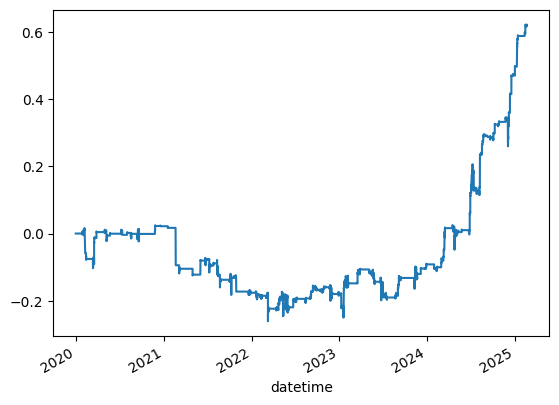

In [182]:
net_returns_ser.cumsum().plot()

In [183]:
sharpe_ratio_ser

total sr         0.754062
in-sample sr    -0.430185
out-sample sr    2.021953
dtype: float64

In [184]:
# outcome_df = pd.DataFrame(0.0, columns=["total sr", "in-sample sr", "out-sample sr"],
#                           index=pd.MultiIndex.from_tuples(
#                               [], names=["z-score", "corr thresholds", "corr selection method"]))

outcome_df = pd.read_csv("./strat_09b_results.csv",
                         index_col=["z-score", "corr thresholds", "corr selection method"])

outcome_df

total sr  \
z-score     corr thresholds corr selection method                    
(1.0, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR -1.303204   
                            CorrSelectionMethod.MIN_CORR -1.594304   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR -0.429624   
                            CorrSelectionMethod.MIN_CORR -0.582469   
(1.5, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR -0.502891   
                            CorrSelectionMethod.MIN_CORR -0.687104   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR  0.306882   
                            CorrSelectionMethod.MIN_CORR  0.443687   
(2.0, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR  0.329674   
                            CorrSelectionMethod.MIN_CORR -0.076983   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR  0.830871   
                            CorrSelectionMethod.MIN_CORR  0.820806   
(2.5, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR  0.729294   
                            CorrSelectionMethod.MIN_CORR  0.592656   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR  0.773724   

                                                          in-sample sr  \
z-score     corr thresholds corr selection method                        
(1.0, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR     -3.952054   
                            CorrSelectionMethod.MIN_CORR     -3.744698   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR     -1.831869   
                            CorrSelectionMethod.MIN_CORR     -2.511296   
(1.5, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR     -2.636338   
                            CorrSelectionMethod.MIN_CORR     -2.812435   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR     -1.429178   
                            CorrSelectionMethod.MIN_CORR     -1.434349   
(2.0, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR     -1.711808   
                            CorrSelectionMethod.MIN_CORR     -2.246486   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR     -1.043895   
                            CorrSelectionMethod.MIN_CORR     -0.652541   
(2.5, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR     -0.822087   
                            CorrSelectionMethod.MIN_CORR     -0.942334   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR     -0.813622   

                                                          out-sample sr  
z-score     corr thresholds corr selection method                        
(1.0, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR       2.465180  
                            CorrSelectionMethod.MIN_CORR       1.380728  
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR       1.852141  
                            CorrSelectionMethod.MIN_CORR       2.285508  
(1.5, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR       2.282353  
                            CorrSelectionMethod.MIN_CORR       1.939924  
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR       2.535021  
                            CorrSelectionMethod.MIN_CORR       2.666418  
(2.0, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR       2.616290  
                            CorrSelectionMethod.MIN_CORR       2.337871  
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR       2.889415  
                            CorrSelectionMethod.MIN_CORR       2.440226  
(2.5, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR       2.390161  
                            CorrSelectionMethod.MIN_CORR       2.301737  
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR       2.390623

In [185]:
raw_outcome_data = {"total sr": [], "in-sample sr": [], "out-sample sr": []}
indices = []

for (df_index, df_val) in outcome_df.iterrows():
    dict_index = (tuple(map(float, df_index[0][1:-1].split(','))),
                  tuple(map(float, df_index[1][1:-1].split(','))),
                  df_index[2])
    
    indices.append(dict_index)
    raw_outcome_data["total sr"].append(df_val["total sr"])
    raw_outcome_data["in-sample sr"].append(df_val["in-sample sr"])
    raw_outcome_data["out-sample sr"].append(df_val["out-sample sr"])

raw_outcome_data

{'total sr': [-1.3032039516679734,
  -1.5943037772895057,
  -0.4296238681664313,
  -0.5824688974919884,
  -0.5028913561442165,
  -0.6871039086735959,
  0.3068821095572469,
  0.4436874051135018,
  0.3296740798634614,
  -0.076983060593252,
  0.8308710206871379,
  0.8208057932522551,
  0.7292937528364768,
  0.5926562715577335,
  0.7737236718712979],
 'in-sample sr': [-3.9520539333661486,
  -3.744697971273188,
  -1.83186850035822,
  -2.5112961499042203,
  -2.636337719977728,
  -2.8124353255993984,
  -1.429178021053752,
  -1.4343494002689996,
  -1.7118080344916868,
  -2.24648564052777,
  -1.0438947397110971,
  -0.6525413087511174,
  -0.8220867902889692,
  -0.9423339589045908,
  -0.8136217069184556],
 'out-sample sr': [2.465179788773985,
  1.3807277352599634,
  1.852140909584993,
  2.285508236127108,
  2.2823534875194667,
  1.9399237615423133,
  2.5350208503459646,
  2.666417862549447,
  2.616289902484644,
  2.3378708223224662,
  2.88941520980386,
  2.440225892703657,
  2.3901610069445645,
 

In [186]:
tuple_index = (index_selections[index_selection_index][0],
               index_selections[index_selection_index][1],
               index_selections[index_selection_index][2])

raw_outcome_data["total sr"].append(sharpe_ratio_ser["total sr"])
raw_outcome_data["in-sample sr"].append(sharpe_ratio_ser["in-sample sr"])
raw_outcome_data["out-sample sr"].append(sharpe_ratio_ser["out-sample sr"])
indices.append(tuple_index)

outcome_df = pd.DataFrame(
    raw_outcome_data,
    index=pd.MultiIndex.from_tuples(indices, names=["z-score", "corr thresholds", "corr selection method"])
)
# outcome_df.index.set_names(["z-score", "corr thresholds", "corr selection method"], inplace=True)
outcome_df

total sr  \
z-score     corr thresholds corr selection method                    
(1.0, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR -1.303204   
                            CorrSelectionMethod.MIN_CORR -1.594304   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR -0.429624   
                            CorrSelectionMethod.MIN_CORR -0.582469   
(1.5, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR -0.502891   
                            CorrSelectionMethod.MIN_CORR -0.687104   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR  0.306882   
                            CorrSelectionMethod.MIN_CORR  0.443687   
(2.0, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR  0.329674   
                            CorrSelectionMethod.MIN_CORR -0.076983   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR  0.830871   
                            CorrSelectionMethod.MIN_CORR  0.820806   
(2.5, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR  0.729294   
                            CorrSelectionMethod.MIN_CORR  0.592656   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR  0.773724   
                            CorrSelectionMethod.MIN_CORR  0.754062   

                                                          in-sample sr  \
z-score     corr thresholds corr selection method                        
(1.0, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR     -3.952054   
                            CorrSelectionMethod.MIN_CORR     -3.744698   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR     -1.831869   
                            CorrSelectionMethod.MIN_CORR     -2.511296   
(1.5, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR     -2.636338   
                            CorrSelectionMethod.MIN_CORR     -2.812435   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR     -1.429178   
                            CorrSelectionMethod.MIN_CORR     -1.434349   
(2.0, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR     -1.711808   
                            CorrSelectionMethod.MIN_CORR     -2.246486   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR     -1.043895   
                            CorrSelectionMethod.MIN_CORR     -0.652541   
(2.5, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR     -0.822087   
                            CorrSelectionMethod.MIN_CORR     -0.942334   
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR     -0.813622   
                            CorrSelectionMethod.MIN_CORR     -0.430185   

                                                          out-sample sr  
z-score     corr thresholds corr selection method                        
(1.0, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR       2.465180  
                            CorrSelectionMethod.MIN_CORR       1.380728  
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR       1.852141  
                            CorrSelectionMethod.MIN_CORR       2.285508  
(1.5, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR       2.282353  
                            CorrSelectionMethod.MIN_CORR       1.939924  
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR       2.535021  
                            CorrSelectionMethod.MIN_CORR       2.666418  
(2.0, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR       2.616290  
                            CorrSelectionMethod.MIN_CORR       2.337871  
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR       2.889415  
                            CorrSelectionMethod.MIN_CORR       2.440226  
(2.5, 10.0) (0.9, 0.8)      CorrSelectionMethod.MAX_CORR       2.390161  
                            CorrSelectionMethod.MIN_CORR       2.301737  
            (0.95, 0.9)     CorrSelectionMethod.MAX_CORR       2.390623  
                            CorrSelectionMethod.MIN_CORR       2.021953

In [187]:
outcome_df.to_csv("./strat_09b_results.csv")

################################################################

(2.0,10.0), (0.95,0.9), MIN_CORR - relatively stable results

(2.5,10.0), (0.95,0.9), MAX_CORR - relatively stable results

(2.5,10.0), (0.95,0.9), MIN_CORR - relatively stable results

In [56]:
def clear_outcome_df_and_write_to_csv():
    outcome_df = pd.DataFrame(0.0, columns=["total sr", "in-sample sr", "out-sample sr"],
                          index=pd.MultiIndex.from_tuples(
                              [], names=["z-score", "corr thresholds", "corr selection method"]))
    outcome_df.to_csv("./strat_09b_results.csv")